In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import nltk
import string
from nltk.corpus import stopwords

import nltk
from nltk.stem import WordNetLemmatizer 
from wordcloud import WordCloud, STOPWORDS
 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, GridSearchCV
 
import warnings

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [4]:
data_path = r"C:\Users\user\Downloads\PRC Data Breach Chronology - 1.13.20 (1).csv"
df1 = pd.read_csv(data_path)
df1

,Date Made Public,Company,City,State,Type of breach,Type of organization,Total Records,Description of incident,Information Source,Source URL,Year of Breach,Latitude,Longitude,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,3/3/2006,PayDay OK LLC,NaN,New Jersey,HACK,BSF,88,The company's website was breached sometime ar...,California Attorney General,https://oag.ca.gov/,2006,40.058324,-74.405661,NaN,NaN,NaN
1,1/4/2012,"SF Fire Credit Union, Pacifica-Coastside Credi...",San Francisco,California,PORT,BSF,0,"The December 29, 2011 theft of a laptop from a...",California Attorney General,NaN,2012,37.774930,-122.419416,NaN,NaN,NaN
2,2/18/2012,"BDO USA, Rubio's Restaurants, Inc.",San Diego,California,PORT,BSR,0,BDO was contracted by Rubio's to perform finan...,California Attorney General,NaN,2012,32.715329,-117.157255,NaN,NaN,NaN
3,2/22/2012,"DHI Mortgage Company, Ltd.",Austin,Texas,HACK,BSF,0,"On February 10, 2012, DHI Mortgage became awar...",California Attorney General,NaN,2012,30.267153,-97.743061,NaN,NaN,NaN
4,3/12/2012,"Impairment Resources, LLC",San Diego,California,PORT,MED,"14,000",An office burglary on New Year's Eve 2011 resu...,California Attorney General,NaN,2012,32.715329,-117.157255,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9010,11/20/2009,"Mark D. Lurie, MD",NaN,CA,PHYS,MED,5166,Location of breached information: Theft\nBusin...,US Department of Health and Human Services,https://ocrportal.hhs.gov/ocr/breach/breach_re...,2009,NaN,NaN,NaN,NaN,NaN
9011,11/17/2009,Health Services for Children with Special Need...,NaN,DC,PHYS,MED,3800,Location of breached information: Loss\nBusine...,US Department of Health and Human Services,https://ocrportal.hhs.gov/ocr/breach/breach_re...,2009,NaN,NaN,NaN,NaN,NaN
9012,10/30/2009,Alaska Department of Health and Social Services,NaN,AK,PHYS,MED,501,Location of breached information: Theft\nBusin...,US Department of Health and Human Services,https://ocrportal.hhs.gov/ocr/breach/breach_re...,2009,NaN,NaN,NaN,NaN,NaN
9013,10/28/2009,"Mid America Kidney Stone Association, LLC",NaN,MO,PHYS,MED,1000,Location of breached information: Theft\nBusin...,US Department of Health and Human Services,https://ocrportal.hhs.gov/ocr/breach/breach_re...,2009,NaN,NaN,NaN,NaN,NaN


# Data Processing


In [5]:

columns = ["Unnamed: 13", "Unnamed: 14", "Unnamed: 15"] #define the columns to be removed
df2= df1.drop(columns, axis=1)

In [6]:


df3 = df2.dropna()

In [7]:
df3.head()

,Date Made Public,Company,City,State,Type of breach,Type of organization,Total Records,Description of incident,Information Source,Source URL,Year of Breach,Latitude,Longitude
291,1/1/2015,Summit Financial Group,La Mesa,California,DISC,BSF,662,"After a Summit client files a tax return, we m...",California Attorney General,https://oag.ca.gov/system/files/Sample%20Notic...,2015,32.767829,-117.023084
431,5/5/2016,Stonebridge Realty Advisors,Glenwood Springs,Colorado,HACK,BSO,0,"""What HappenedBased upon an extensive forensic...",California Attorney General,https://oag.ca.gov/system/files/49932072_6_1.pdf,2016,39.550538,-107.324776
467,8/3/2016,Yuba Sutter Medical Center,Yuba City,California,HACK,MED,0,"""What HappenedOn or about August 3, 2016, the ...",California Attorney General,https://oag.ca.gov/ecrime/databreach/reports/s...,2016,39.140448,-121.616911
503,10/20/2016,Premium Beat,Montreal,Quebec,HACK,BSO,0,"""To ensure you continue having the highest lev...",California Attorney General,https://oag.ca.gov/ecrime/databreach/reports/s...,2016,45.501689,-73.567256
583,3/3/2017,"Weekends Only, Inc.",St. Louis,Missouri,HACK,MED,0,"name, payment card info, address\nLocation of ...",California Attorney General,http://www.marylandattorneygeneral.gov/Pages/I...,2017,38.713107,-90.429840


In [8]:

df3.shape

(359, 13)

In [9]:
df3.drop_duplicates(keep='first', inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_12588\4284196578.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.drop_duplicates(keep='first', inplace=True)


In [10]:
df3.shape

(359, 13)

In [11]:
df3.isnull().count()

Date Made Public           359
Company                    359
City                       359
State                      359
Type of breach             359
Type of organization       359
Total Records              359
Description of incident    359
Information Source         359
Source URL                 359
Year of Breach             359
Latitude                   359
Longitude                  359
dtype: int64

In [12]:
df3.fillna('missinginfo', inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_12588\2212432003.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.fillna('missinginfo', inplace=True)


In [13]:
df3.isnull().count()

Date Made Public           359
Company                    359
City                       359
State                      359
Type of breach             359
Type of organization       359
Total Records              359
Description of incident    359
Information Source         359
Source URL                 359
Year of Breach             359
Latitude                   359
Longitude                  359
dtype: int64

In [14]:
df3.value_counts(normalize=True)

Date Made Public  Company                                                                                   City          State          Type of breach  Type of organization  Total Records  Description of incident                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [15]:

df3.head(15)

,Date Made Public,Company,City,State,Type of breach,Type of organization,Total Records,Description of incident,Information Source,Source URL,Year of Breach,Latitude,Longitude
291,1/1/2015,Summit Financial Group,La Mesa,California,DISC,BSF,662,"After a Summit client files a tax return, we m...",California Attorney General,https://oag.ca.gov/system/files/Sample%20Notic...,2015,32.767829,-117.023084
431,5/5/2016,Stonebridge Realty Advisors,Glenwood Springs,Colorado,HACK,BSO,0,"""What HappenedBased upon an extensive forensic...",California Attorney General,https://oag.ca.gov/system/files/49932072_6_1.pdf,2016,39.550538,-107.324776
467,8/3/2016,Yuba Sutter Medical Center,Yuba City,California,HACK,MED,0,"""What HappenedOn or about August 3, 2016, the ...",California Attorney General,https://oag.ca.gov/ecrime/databreach/reports/s...,2016,39.140448,-121.616911
503,10/20/2016,Premium Beat,Montreal,Quebec,HACK,BSO,0,"""To ensure you continue having the highest lev...",California Attorney General,https://oag.ca.gov/ecrime/databreach/reports/s...,2016,45.501689,-73.567256
583,3/3/2017,"Weekends Only, Inc.",St. Louis,Missouri,HACK,MED,0,"name, payment card info, address\nLocation of ...",California Attorney General,http://www.marylandattorneygeneral.gov/Pages/I...,2017,38.713107,-90.429840
604,4/4/2017,Auto Pride Car Wash,Redwood City,California,HACK,BSO,0,"""Auto Pride Car Wash was informed on March 27,...",California Attorney General,https://oag.ca.gov/ecrime/databreach/reports/s...,2017,37.485215,-122.236355
605,4/6/2017,Edgar & Associates LLP,Sacramento,California,HACK,BSF,0,"""What Happened?After experiencing unusual acti...",California Attorney General,https://oag.ca.gov/ecrime/databreach/reports/s...,2017,38.492536,-121.522269
606,4/10/2017,WildWater Express Carwash,Sab Pedro,California,HACK,BSO,0,"""WildWater Express Carwash was informed on Mar...",California Attorney General,https://oag.ca.gov/ecrime/databreach/reports/s...,2017,33.737600,-118.289892
607,4/10/2017,Acme Car Wash and Clearwater Express,Salina,California,HACK,BSO,0,"""Acme Car Wash and Clearwater Express Car Wash...",California Attorney General,https://oag.ca.gov/ecrime/databreach/reports/s...,2017,38.840281,-97.611424
608,4/13/2017,Fingerhut,Saint Cloud,Minnesota,HACK,BSO,0,"""What Happened We believe that your personal i...",California Attorney General,https://oag.ca.gov/ecrime/databreach/reports/s...,2017,45.566318,-94.245355


In [16]:

gkk = df3.groupby(['Type of breach', 'Type of organization'])
  

gkk.first()

Date Made Public  \
Type of breach Type of organization                    
DISC           BSF                          1/1/2015   
               BSO                         11/9/2017   
               BSR                        12/23/2017   
               EDU                        11/14/2017   
               GOV                         4/24/2017   
               MED                         5/17/2017   
               NGO                        12/28/2017   
HACK           BSF                          4/6/2017   
               BSO                          5/5/2016   
               BSR                        12/28/2017   
               EDU                         4/20/2017   
               GOV                          9/1/2016   
               MED                          8/3/2016   
               NGO                         5/17/2017   
INSD           BSF                         2/21/2007   
               GOV                         9/16/2017   
               MED                         6/30/2017   
PHYS           BSF                         7/27/2017   
               BSO                        11/15/2017   
               EDU                         11/9/2017   
               MED                          2/3/2014   
PORT           BSF                          9/8/2017   
               BSO                          2/6/2016   
               MED                         3/25/2014   
UNKN           BSO                        12/29/2017   
               BSR                         1/19/2018   
               EDU                         1/24/2018   

                                                                               Company  \
Type of breach Type of organization                                                      
DISC           BSF                                              Summit Financial Group   
               BSO                                     Corovan/Corodata/Klinger Moving   
               BSR                                             Ancestry's RootsWeb.com   
               EDU                                    Bakersfield City School District   
               GOV                        Los Angeles City Employees Retirement System   
               MED                                                MolinaHealthcare.com   
               NGO                                                       SAY San Diego   
HACK           BSF                                              Edgar & Associates LLP   
               BSO                                         Stonebridge Realty Advisors   
               BSR                                                           Forever21   
               EDU                                 Campbell Union High School District   
               GOV                                New York State Psychiatric Institute   
               MED                                          Yuba Sutter Medical Center   
               NGO                                                      UNM Foundation   
INSD           BSF                              Fidelity National Information Services   
               GOV                                     Arkansas Department of Medicaid   
               MED                                           White Blossom Care Center   
PHYS           BSF                              Hamilton Zanze Real Estate Investments   
               BSO                                           Cheddar's Scratch Kitchen   
               EDU                                                  Chapman University   
               MED                                           Greenleaf Book Group, LLC   
PORT           BSF                                                  Cohn Handles Sturm   
               BSO                                            Ocean Acquisitions, Inc.   
               MED                            University of Kentucky HealthCare/Talyst   
UNKN           BSO                            Mid-Atlantic Carpenters' 

In [17]:

import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))
print(stop_words)

{'because', 'doesn', 'i', 'of', 'my', 'will', 'yourself', 'yourselves', 'had', 'been', "shouldn't", 'under', 'once', 'an', 'down', 'no', 'up', 'if', "weren't", 'to', 'was', 'not', 'what', 'are', 'why', "wouldn't", 'mightn', 'should', 'above', 'further', 'before', 'than', 'am', 'between', 'this', 'off', 'whom', 'both', 'haven', 'these', 'itself', 'ain', 'by', "you'd", 'but', 'or', 'very', 'being', 'yours', 'shan', 'few', 't', 'shouldn', 'doing', 'again', 'couldn', 'it', 'they', 'having', 'wasn', "aren't", 'in', 'weren', 'out', 'until', 'some', "won't", 'after', 'his', 'me', 'do', 'own', 'now', 'each', "should've", 'that', 'with', "mustn't", 'from', 'll', 'ma', 'ours', 'same', 'does', 'the', "she's", 'he', 'through', 'be', 'when', "couldn't", "hadn't", 're', 'those', "haven't", 'just', 'is', 'below', 'them', "hasn't", 'won', 'other', 'while', 'against', "didn't", "mightn't", 'her', "shan't", 'don', 'their', 'himself', 'which', 'a', 'during', 'o', "you've", 'have', 'hadn', 'hasn', 'oursel

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:

lemmatizer = WordNetLemmatizer()

stop_words = stopwords.words("english")
wordnet = nltk.stem.WordNetLemmatizer()
def text_preproc(x):
  x = x.lower()
  x = ' '.join([word for word in x.split(' ') if word not in stop_words])
  x = x.encode('ascii', 'ignore').decode()
  x = re.sub(r'https*\S+', ' ', x)
  x = re.sub(r'@\S+', ' ', x)
  x = re.sub(r'#\S+', ' ', x)
  x = re.sub(r'\'\w+', '', x)
  x = re.sub('[%s]' % re.escape(string.punctuation), ' ', x)
  x = re.sub(r'\w*\d+\w*', '', x)
  x = re.sub(r'\s{2,}', ' ', x)
  return x


In [21]:

df3['text'] = df3['Description of incident'].apply(text_preproc)
df3.head(20)

C:\Users\user\AppData\Local\Temp\ipykernel_12588\3965427745.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['text'] = df3['Description of incident'].apply(text_preproc)


,Date Made Public,Company,City,State,Type of breach,Type of organization,Total Records,Description of incident,Information Source,Source URL,Year of Breach,Latitude,Longitude,text
291,1/1/2015,Summit Financial Group,La Mesa,California,DISC,BSF,662,"After a Summit client files a tax return, we m...",California Attorney General,https://oag.ca.gov/system/files/Sample%20Notic...,2015,32.767829,-117.023084,summit client files tax return mail client cd ...
431,5/5/2016,Stonebridge Realty Advisors,Glenwood Springs,Colorado,HACK,BSO,0,"""What HappenedBased upon an extensive forensic...",California Attorney General,https://oag.ca.gov/system/files/49932072_6_1.pdf,2016,39.550538,-107.324776,what happenedbased upon extensive forensic in...
467,8/3/2016,Yuba Sutter Medical Center,Yuba City,California,HACK,MED,0,"""What HappenedOn or about August 3, 2016, the ...",California Attorney General,https://oag.ca.gov/ecrime/databreach/reports/s...,2016,39.140448,-121.616911,what happenedon august yuba sutter medical cl...
503,10/20/2016,Premium Beat,Montreal,Quebec,HACK,BSO,0,"""To ensure you continue having the highest lev...",California Attorney General,https://oag.ca.gov/ecrime/databreach/reports/s...,2016,45.501689,-73.567256,to ensure continue highest level customer sec...
583,3/3/2017,"Weekends Only, Inc.",St. Louis,Missouri,HACK,MED,0,"name, payment card info, address\nLocation of ...",California Attorney General,http://www.marylandattorneygeneral.gov/Pages/I...,2017,38.713107,-90.429840,name payment card info address\nlocation breac...
604,4/4/2017,Auto Pride Car Wash,Redwood City,California,HACK,BSO,0,"""Auto Pride Car Wash was informed on March 27,...",California Attorney General,https://oag.ca.gov/ecrime/databreach/reports/s...,2017,37.485215,-122.236355,auto pride car wash informed march point of s...
605,4/6/2017,Edgar & Associates LLP,Sacramento,California,HACK,BSF,0,"""What Happened?After experiencing unusual acti...",California Attorney General,https://oag.ca.gov/ecrime/databreach/reports/s...,2017,38.492536,-121.522269,what happened after experiencing unusual acti...
606,4/10/2017,WildWater Express Carwash,Sab Pedro,California,HACK,BSO,0,"""WildWater Express Carwash was informed on Mar...",California Attorney General,https://oag.ca.gov/ecrime/databreach/reports/s...,2017,33.737600,-118.289892,wildwater express carwash informed march poin...
607,4/10/2017,Acme Car Wash and Clearwater Express,Salina,California,HACK,BSO,0,"""Acme Car Wash and Clearwater Express Car Wash...",California Attorney General,https://oag.ca.gov/ecrime/databreach/reports/s...,2017,38.840281,-97.611424,acme car wash clearwater express car wash inf...
608,4/13/2017,Fingerhut,Saint Cloud,Minnesota,HACK,BSO,0,"""What Happened We believe that your personal i...",California Attorney General,https://oag.ca.gov/ecrime/databreach/reports/s...,2017,45.566318,-94.245355,what happened believe personal information ac...


In [22]:
lst = df3.text
def flatten(lst):
    for elem in lst:
        if type(elem) in (tuple,list):
           for i in flatten(elem):
               yield i
        else:
             yield elem 
hacked_lists = list (flatten(lst))
hacked_lists

['summit client files tax return mail client cd contains tax return january february connection performing tax return services clients mailed cds sixty seven clients intended cds would contain individual recipient tax return information april client contacted summit inform us single cd clients data it immediately retrieved dc confirmed individual retained information cd time reason believe cds information relating clients stored them may one client contacted us informed us cd he she received also contained clients tax return compiled result immediately began investigation started personally visit sixty seven clients retrieve cds issued january february cds either destroyed clients personally collected summit maintaining locked container ',
 ' what happenedbased upon extensive forensic investigation appears unauthorized individuals installed malicious software payment processing systems designed capture payment card information inputted systems what information involvedbased information

In [23]:
flt_hacked_lists = ' '.join(hacked_lists)
len(flt_hacked_lists)

182593

In [24]:

warnings.simplefilter(action='ignore')
 
%matplotlib inline

In [25]:
WC_height = 1000
WC_width = 2000
WC_max_words = 300

In [29]:
wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width)


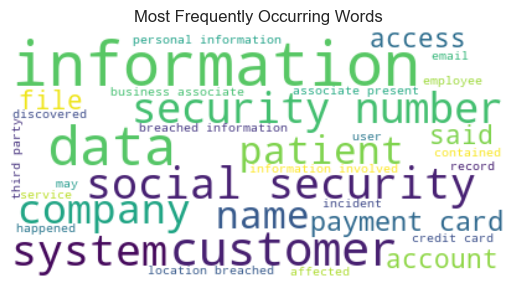

In [30]:

wordCloud = WordCloud(
    background_color='white',  
    colormap='viridis',       
    max_font_size=50,         
    min_font_size=10,         
    max_words=100,          
    contour_color='steelblue', 
    contour_width=1,         
    random_state=42          
)


wordCloud.generate_from_text(flt_hacked_lists)


plt.title('Most Frequently Occurring Words')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()
